In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy

In [2]:
data_root = './ktp_selfie_mergedatasets'

In [3]:
# Create data generator for training and validation

img_height = 150
img_width = 150
IMAGE_SHAPE = (img_width, img_height)

batch_size = 64

TRAINING_DATA_DIR = str(data_root)

datagen_kwargs = dict(rescale=1./255, validation_split=.30)
train_datagen = ImageDataGenerator(
    **datagen_kwargs,
    rotation_range=30, 
    width_shift_range=0.2,
    height_shift_range=0.2, 
    brightness_range=[0.5,1.5],  
    zoom_range=0.2,
    horizontal_flip=True, 
    preprocessing_function=None, 
    data_format=None, 
    #validation_split=0.2, 
    dtype=None
) # set validation split

valid_datagen = ImageDataGenerator(**datagen_kwargs)



train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
) # set as training data

valid_generator = valid_datagen.flow_from_directory(
    #train_data_dir, # same directory as training data
    TRAINING_DATA_DIR,
    target_size=(img_height, img_width),
    batch_size= batch_size,
    class_mode='categorical',
    shuffle = True,
    subset='validation'
) # set as validation data

Found 1402 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [4]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2), 
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    # tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(32, activation='relu'), 
    # 3 output neuron. It will contain a value from 0-2 where 0 for class ('KK'), 1 for the class ('KTP'), and 2 for the class ('NPWP')
    tf.keras.layers.Dense(2, activation='sigmoid')  
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 32)                11214880  
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 11,216,738
Trainable params: 11,216,738
Non-trainable params: 0
____________________________________________

In [11]:
# Compile model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [12]:
mc = tf.keras.callbacks.ModelCheckpoint('ktp_selfie_model_v3_01.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [13]:
history = model.fit(
            train_generator,
            # steps_per_epoch=100,
            epochs=30,
            validation_data=valid_generator,
            callbacks = [mc], 
            # validation_steps=50,
            # verbose=2
            )

Epoch 1/30
22/22 [==============================] - ETA: 0s - loss: 1.1017 - accuracy: 0.6683
Epoch 1: val_loss improved from inf to 0.70965, saving model to ktp_selfie_model_v3_01.h5
22/22 [==============================] - 11s 451ms/step - loss: 1.1017 - accuracy: 0.6683 - val_loss: 0.7096 - val_accuracy: 0.7517
Epoch 2/30
22/22 [==============================] - ETA: 0s - loss: 0.4506 - accuracy: 0.8195
Epoch 2: val_loss improved from 0.70965 to 0.67485, saving model to ktp_selfie_model_v3_01.h5
22/22 [==============================] - 10s 449ms/step - loss: 0.4506 - accuracy: 0.8195 - val_loss: 0.6749 - val_accuracy: 0.7200
Epoch 3/30
22/22 [==============================] - ETA: 0s - loss: 0.3575 - accuracy: 0.8538
Epoch 3: val_loss improved from 0.67485 to 0.56306, saving model to ktp_selfie_model_v3_01.h5
22/22 [==============================] - 10s 435ms/step - loss: 0.3575 - accuracy: 0.8538 - val_loss: 0.5631 - val_accuracy: 0.7933
Epoch 4/30
22/22 [==========================

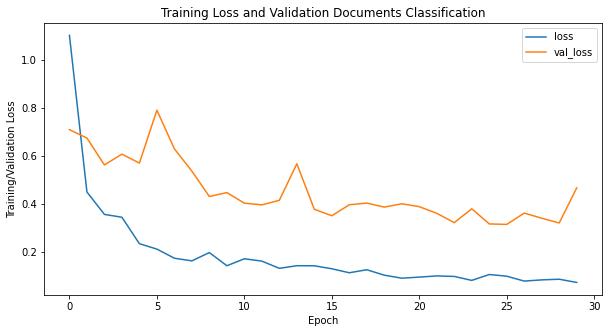

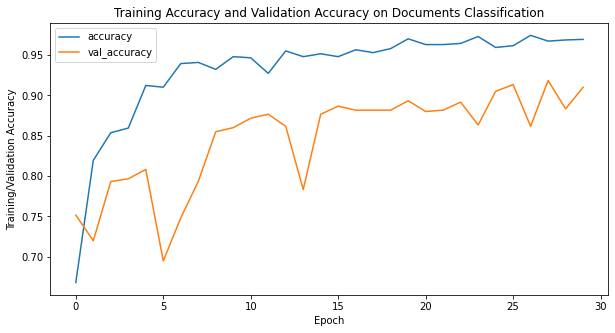

In [14]:
# Plotting train_loss vs val_loss
plt.figure(figsize = (10, 5))
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.title("Training Loss and Validation Documents Classification")
plt.xlabel("Epoch")
plt.ylabel("Training/Validation Loss")
plt.legend()

# Plotting train_accuracy vs Val_accuracy
plt.figure(figsize = (10, 5))
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")
plt.title("Training Accuracy and Validation Accuracy on Documents Classification")
plt.xlabel("Epoch")
plt.ylabel("Training/Validation Accuracy")
plt.legend(loc = "upper left")

In [15]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

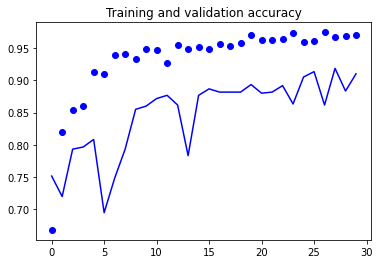

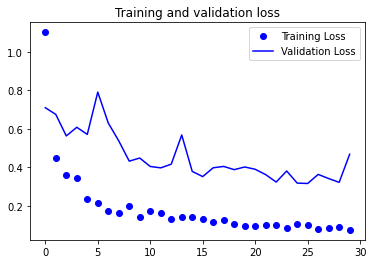

In [16]:
# Plot training results
plot_loss_acc(history)

In [17]:
import tensorflow as tf
final_model = tf.keras.models.load_model('./ktp_selfie_model_v3_01.h5')

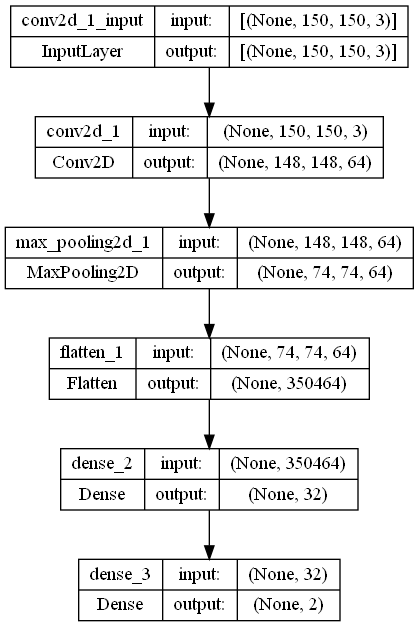

In [18]:
tf.keras.utils.plot_model(final_model, show_shapes=True)

In [19]:
valid_generator = valid_datagen.flow_from_directory(
    #train_data_dir, # same directory as training data
    TRAINING_DATA_DIR,
    target_size=(img_height, img_width),
    batch_size= batch_size,
    class_mode='categorical',
    shuffle = False,
    subset='validation'
) # set as validation data

Found 600 images belonging to 2 classes.


In [20]:
import numpy
import sklearn.metrics as metrics

# predictions = final_model.predict_generator(valid_generator)
predictions = final_model.predict(valid_generator)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)


true_classes = valid_generator.classes
class_labels = list(valid_generator.class_indices.keys())   

report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  


10/10 [==============================] - 2s 136ms/step
                     precision    recall  f1-score   support

   ktp_augmented-v2       0.88      0.95      0.92       300
selfie_augmented-v2       0.95      0.87      0.91       300

           accuracy                           0.91       600
          macro avg       0.92      0.91      0.91       600
       weighted avg       0.92      0.91      0.91       600



In [30]:
TEST_DIR = './testing image-processing'

In [34]:
valid_datagen = ImageDataGenerator(**datagen_kwargs)
test_generator = valid_datagen.flow_from_directory(
    #train_data_dir, # same directory as training data
    TEST_DIR,
    target_size=(img_height, img_width),
    batch_size= batch_size,
    shuffle = False,
) # set as validation data

Found 8 images belonging to 1 classes.


(8, 150, 150, 3)


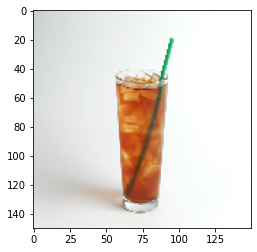

(8, 150, 150, 3)


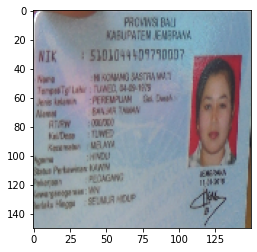

(8, 150, 150, 3)


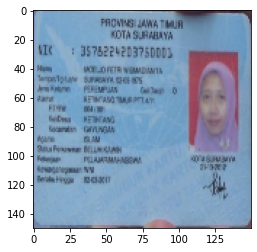

(8, 150, 150, 3)


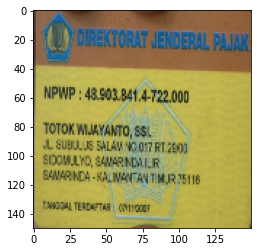

(8, 150, 150, 3)


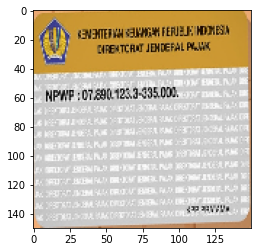

(8, 150, 150, 3)


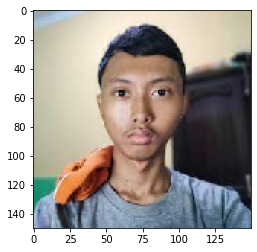

(8, 150, 150, 3)


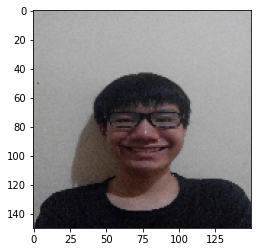

(8, 150, 150, 3)


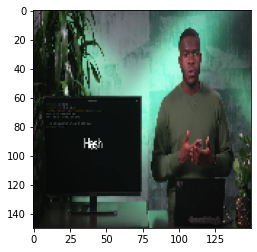

In [35]:
for i in range(8):
    img, label = test_generator.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[i])
    plt.show()

In [36]:
predictions = final_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
print(predictions)

1/1 [==============================] - 0s 78ms/step
[[4.9045873e-01 4.8503911e-01]
 [9.9829644e-01 1.2474189e-03]
 [9.9995935e-01 1.9226727e-05]
 [3.3660758e-01 7.0747548e-01]
 [6.7913461e-01 3.0920455e-01]
 [5.7847513e-04 9.9936610e-01]
 [2.4795594e-02 9.6953255e-01]
 [6.8866628e-01 3.1159389e-01]]


In [6]:
final_model = tf.keras.models.load_model('./ktp_selfie_model_v3_01.h5')

# Check its architecture
final_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 350464)            0         
                                                                 
 dense_2 (Dense)             (None, 32)                11214880  
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 11,216,738
Trainable params: 11,216,738
Non-trainable params: 0
__________________________________________

In [ ]:
from keras.models import load_model
saved_model = load_model('ktp_selfie_model_v3_01.h5')
_, train_acc = saved_model.evaluate(train_generator, train_generator.classes, verbose=0)
_, valid_acc = saved_model.evaluate(valid_generator, valid_generator.classes, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

In [9]:
import tempfile
import os

MODEL_DIR = './exp_ktp_selfie_model_v3_01'

# version = 2

# export_path = os.path.join(MODEL_DIR, str(version))
export_path = os.path.join(MODEL_DIR)

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: ./exp_ktp_selfie_model_v3_01\assets


INFO:tensorflow:Assets written to: ./exp_ktp_selfie_model_v3_01\assets



export_path = ./exp_ktp_selfie_model_v3_01


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [10]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'ktp_selfie_model_v3_01.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

label_types = ['ktp', 'selfie']
with open('ktp_selfie_model_v3_01.txt', 'w') as f:
    f.write('\n'.join(label_types))